<a href="https://colab.research.google.com/github/gulabpatel/TimeSeries/blob/main/15%3A%20Auto_Time_Series_using_Auto_ts_energy_consumption_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install auto-ts
!pip install tscv

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import plotly.express as px
from auto_ts import auto_timeseries

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

Imported auto_timeseries version:0.0.26. Call by using:
model = auto_timeseries(score_type='rmse', forecast_period=forecast_period,
                time_interval='Month',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)

model.fit(traindata, ts_column,target)
model.predict(testdata, forecast_period)



In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv', index_col=0, parse_dates=True)

In [ ]:
df

demand  precip   temp
timeStamp                                 
2012-01-01 00:00:00  4937.5  0.0000  46.13
2012-01-01 01:00:00  4752.1  0.0000  45.89
2012-01-01 02:00:00  4542.6  0.0000  45.04
2012-01-01 03:00:00  4357.7  0.0000  45.03
2012-01-01 04:00:00  4275.5  0.0000  42.61
...                     ...     ...    ...
2017-08-12 02:00:00     NaN  0.0000  70.84
2017-08-12 03:00:00     NaN  0.0000  70.57
2017-08-12 04:00:00     NaN  0.0000  69.89
2017-08-12 05:00:00     NaN  0.0000  68.59
2017-08-12 06:00:00     NaN  0.0031  67.33

[49205 rows x 3 columns]

In [ ]:
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [ ]:
fig = px.line(df.reset_index(), x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f153fb07780>,
      dtype=object)

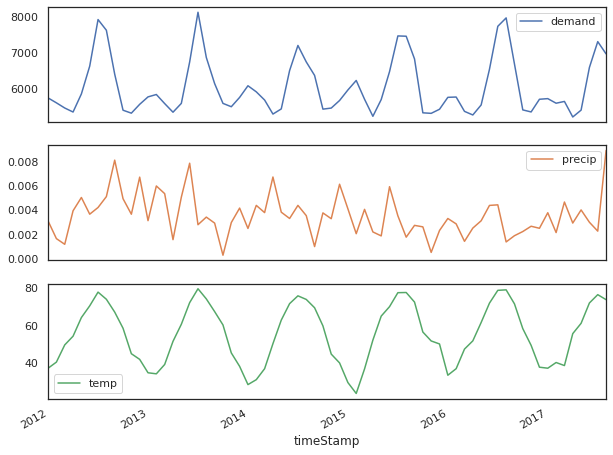

In [ ]:
df.resample('M').mean().plot(subplots=True)

In [ ]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  49205
Columns  :  3

Features : 
 ['demand', 'precip', 'temp']

Missing values :   demand    True
precip    True
temp      True
dtype: bool

Unique values :  
 demand    40972
precip     1004
temp       7580
dtype: int64


In [ ]:
df.query('demand != demand')

demand  precip   temp
timeStamp                                 
2012-03-11 02:00:00     NaN  0.0000  37.78
2013-03-10 02:00:00     NaN  0.0000  38.18
2014-03-09 02:00:00     NaN  0.0000  40.86
2015-03-08 02:00:00     NaN  0.0000  36.96
2015-03-11 11:00:00     NaN  0.0000  49.95
...                     ...     ...    ...
2017-08-12 02:00:00     NaN  0.0000  70.84
2017-08-12 03:00:00     NaN  0.0000  70.57
2017-08-12 04:00:00     NaN  0.0000  69.89
2017-08-12 05:00:00     NaN  0.0000  68.59
2017-08-12 06:00:00     NaN  0.0031  67.33

[81 rows x 3 columns]

#fill missing values using ffill method

In [ ]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill')

In [ ]:
ny_df=df.resample('M').mean().reset_index()

In [ ]:
ny_df

timeStamp       demand    precip       temp
0  2012-01-31  5757.495833  0.003116  37.174288
1  2012-02-29  5622.331609  0.001650  40.448046
2  2012-03-31  5479.919198  0.001179  49.607917
3  2012-04-30  5368.945833  0.003959  54.255903
4  2012-05-31  5867.896102  0.005064  64.188078
..        ...          ...       ...        ...
63 2017-04-30  5233.477382  0.002942  55.621764
64 2017-05-31  5421.773060  0.004031  61.115457
65 2017-06-30  6597.990346  0.003008  71.962625
66 2017-07-31  7306.861511  0.002272  76.380363
67 2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 4 columns]

In [ ]:
train=ny_df[(ny_df['timeStamp'] >= '2012-01-01') & (ny_df['timeStamp'] <= '2017-04-30')]
test=ny_df[(ny_df['timeStamp'] > '2017-04-30')]

In [ ]:
train.shape

(64, 4)

In [ ]:
test.shape

(4, 4)

In [ ]:
model = auto_timeseries(score_type='rmse', non_seasonal_pdq=(2,1,2), seasonality=True, model_type=['best'], verbose=2)

In [ ]:
model

Start of Fit.....
    Target variable given as = demand
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: timeStamp sep: , target: demand
    Dataframe loaded successfully. Shape of data set = (64, 2)
Time Interval between obserations has not been provided. Auto_TS will try to infer this now...
Time series input in days = 29
It is a Monthly time series.


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(64, 3)) with Confidence Interval = 0.95...
  Starting Prophet Fit
  End of Prophet Fit
NumObs: 64
NFOLDS: 3
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 3


Fold Number: 1 --> Train Shape: (49, 3) Test Shape: (5, 3)
    RMSE = 119.77
    Std Deviation of Originals = 497.40
    Normalized RMSE = 24%
Cross Validation window: 1 completed


Fold Number: 2 --> Train Shape: (54, 3) Test Shape: (5, 3)
    RMSE = 459.47
    Std Deviation of Originals = 1,226.45
  

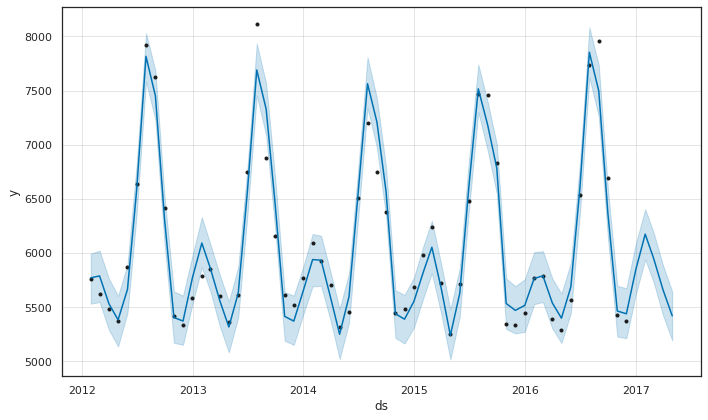

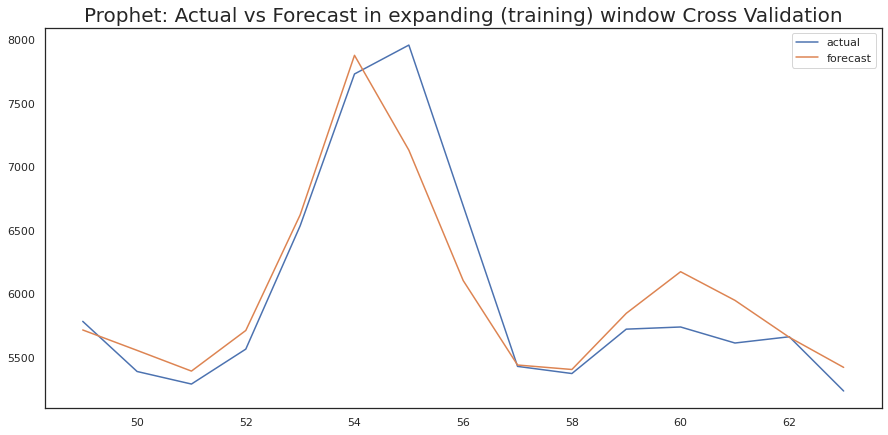

In [ ]:
model.fit(traindata=train[['timeStamp','demand','temp']], ts_column='timeStamp', target='demand', cv=3)

In [ ]:
model.get_leaderboard()

name        rmse
3            ML  171.346062
1  auto_SARIMAX  234.865251
2           VAR  268.950355
0       Prophet  281.641704

In [ ]:
model.get_cv_scores()

Model   CV Scores
0        Prophet  119.767661
1        Prophet  459.465886
2        Prophet  265.691565
3   auto_SARIMAX  205.284767
4   auto_SARIMAX  188.999948
5   auto_SARIMAX  310.311036
6            VAR   42.468372
7            VAR   63.460438
8            VAR  700.922256
9             ML  188.809880
10            ML  187.220258
11            ML  138.008046

In [ ]:
results_dict = model.get_ml_dict()

In [ ]:
results_dict

defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>>,
            {'ML': defaultdict(<function auto_ts.auto_timeseries.fit.<locals>.<lambda>>,
                         {'forecast': [],
                          'model': BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                criterion='mse',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_sample

In [ ]:
results_dict['VAR']['forecast']  #default confidence interval in auto_ts is 95%

[demand             mean     mean_se  mean_ci_lower  mean_ci_upper
 2017-02-28  5569.209054  333.588272    4915.388054    6223.030054,
 demand             mean     mean_se  mean_ci_lower  mean_ci_upper
 2017-03-31  5597.517394  330.756471    4949.246624    6245.788164,
 demand             mean     mean_se  mean_ci_lower  mean_ci_upper
 2017-04-30  5934.399638  327.850375     5291.82471    6576.974566]

In [ ]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='ML')  
future_predictions

mean  mean_se  mean_ci_lower  mean_ci_upper
timeStamp                                                     
2017-05-31  5580.899218      NaN            NaN            NaN
2017-06-30  6585.674712      NaN            NaN            NaN
2017-07-31  7461.819950      NaN            NaN            NaN
2017-08-31  6941.656045      NaN            NaN            NaN

In [ ]:
test

timeStamp       demand    precip       temp
64 2017-05-31  5421.773060  0.004031  61.115457
65 2017-06-30  6597.990346  0.003008  71.962625
66 2017-07-31  7306.861511  0.002272  76.380363
67 2017-08-31  6711.707542  0.008961  73.730258

In [ ]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='VAR')  
future_predictions

demand             mean     mean_se  mean_ci_lower  mean_ci_upper
2017-05-31  5412.775557  337.605378    4751.081174    6074.469939
2017-06-30  6116.295097  486.861057    5162.064958    7070.525235
2017-07-31  6757.402579  523.530929    5731.300814    7783.504345
2017-08-31  6875.236090  556.485766    5784.544031    7965.928149

In [ ]:
future_predictions = model.predict(testdata=test[['timeStamp','demand','temp']], model='Prophet')  
future_predictions

Building Forecast dataframe. Forecast Period = 4


ds       trend  ...  multiplicative_terms_upper         yhat
0 2017-05-31  6054.96490  ...                         0.0  5697.155248
1 2017-06-30  6057.32650  ...                         0.0  6611.838687
2 2017-07-31  6059.76682  ...                         0.0  7772.334545
3 2017-08-31  6062.20714  ...                         0.0  7422.188174

[4 rows x 22 columns]

-------------------------